In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [24]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [26]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


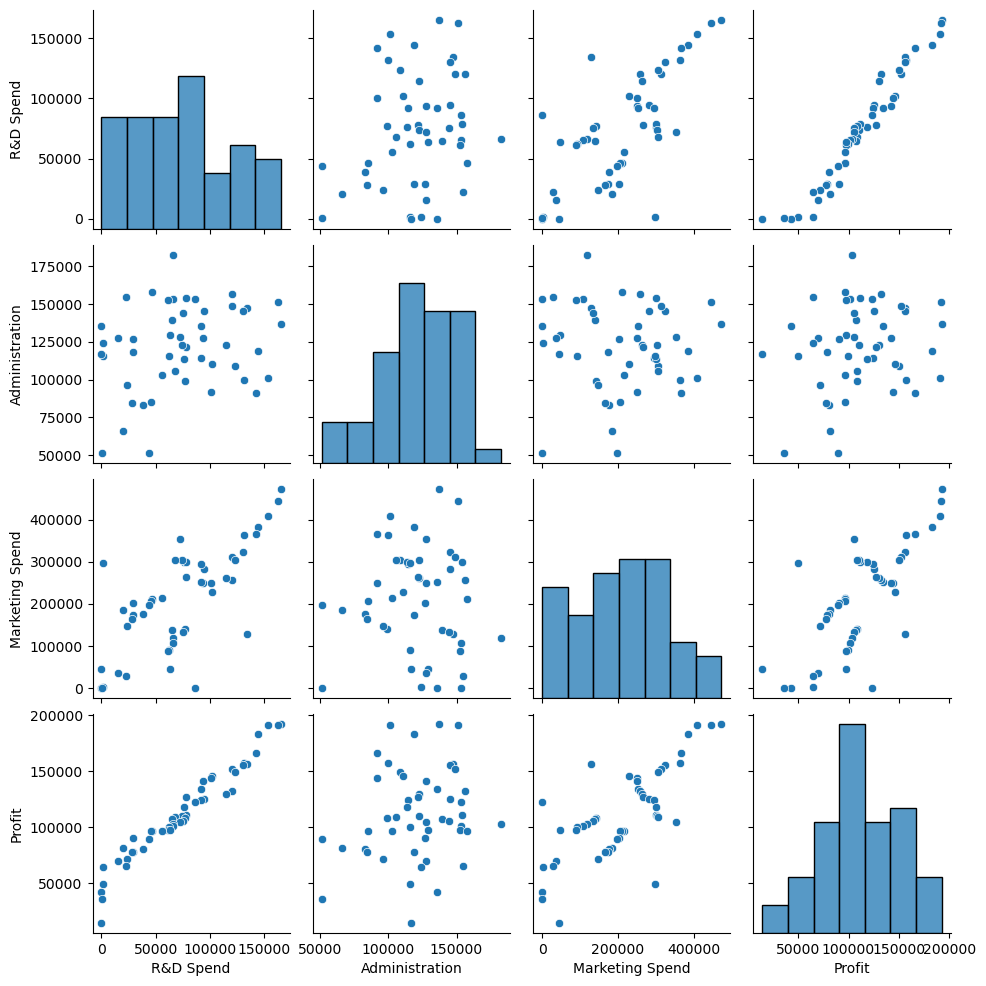

In [27]:
sns.pairplot(data)
plt.show()

In [28]:
df_train, df_test = train_test_split(data, train_size= 0.7, random_state= 50)
df_train.shape, df_test.shape

((35, 4), (15, 4))

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
v = ['R&D Spend','Administration','Marketing Spend','Profit']
df_train[v] = scaler.fit_transform(df_train[v])
df_train.head()


,R&D Spend,Administration,Marketing Spend,Profit
3,0.873136,0.512998,0.812235,0.947292
39,0.233194,0.241309,0.370931,0.373489
15,0.692617,0.543030,0.554864,0.648921
41,0.168691,0.254469,0.348614,0.355430
19,0.522650,0.778236,0.000000,0.608713


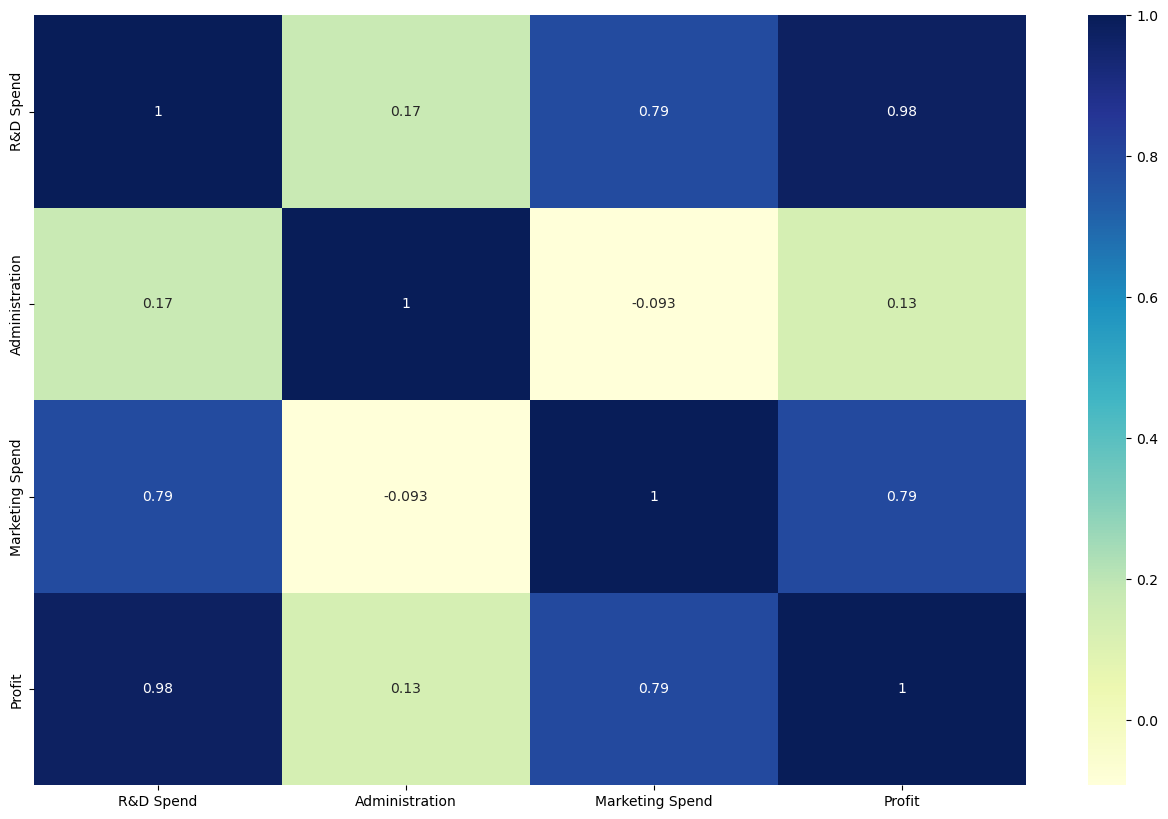

In [31]:
plt.figure(figsize= (16,10))
sns.heatmap(df_train.corr(),annot= True, cmap= 'YlGnBu')
plt.show()

In [32]:
y_train = df_train.pop('Profit')
X_train = df_train
X_train.head()

,R&D Spend,Administration,Marketing Spend
3,0.873136,0.512998,0.812235
39,0.233194,0.241309,0.370931
15,0.692617,0.543030,0.554864
41,0.168691,0.254469,0.348614
19,0.522650,0.778236,0.000000


In [33]:
y_train.head()

3     0.947292
39    0.373489
15    0.648921
41    0.355430
19    0.608713
Name: Profit, dtype: float64

In [34]:
import statsmodels.api as sm


In [35]:
X_train_sm = sm.add_constant(X_train['R&D Spend'])

lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     668.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.78e-23
Time:                        19:53:16   Log-Likelihood:                 53.678
No. Observations:                  35   AIC:                            -103.4
Df Residuals:                      33   BIC:                            -100.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1743      0.017     10.302      0.000       0.140       0.209
R&D Spend      0.8116      0.031     25.847      0.000       0.748       0.875
==============================================================================
Omnibus:                       10.559   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.842
Skew:                          -0.924   Prob(JB):                      0.00442
Kurtosis:                       5.006   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
y_train_pred = lr_model1.predict(X_train_sm)
res = (y_train - y_train_pred)

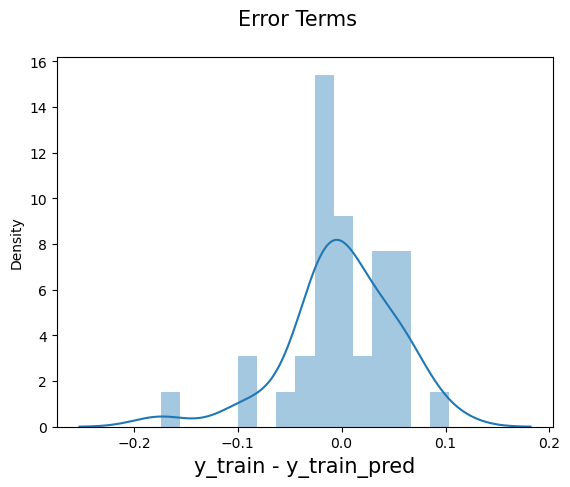

In [37]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

Almost normal distribution

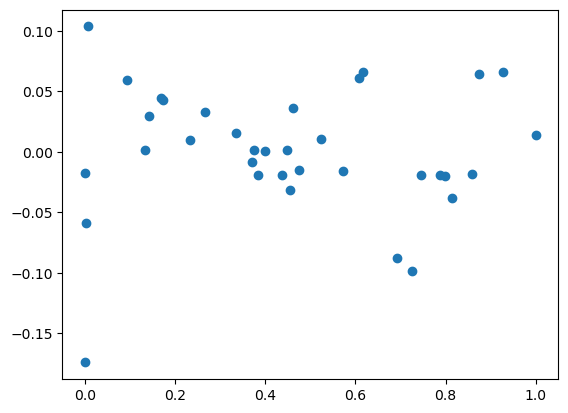

In [38]:
plt.scatter(X_train['R&D Spend'],res)
plt.show()

no specific patterns in errors and mean value is 0 so the model fit is not by chance

In [39]:
X_train_sm = sm.add_constant(X_train[['Marketing Spend','R&D Spend']])

lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     333.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           3.78e-22
Time:                        19:53:16   Log-Likelihood:                 54.147
No. Observations:                  35   AIC:                            -102.3
Df Residuals:                      32   BIC:                            -97.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1707      0.017      9.814      0.000       0.135       0.206
Marketing Spend     0.0493      0.053      0.932      0.358      -0.058       0.157
R&D Spend           0.7739      0.051     15.112      0.000       0.670       0.878
==============================================================================
Omnibus:                       11.483   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.979
Skew:                          -0.935   Prob(JB):                      0.00152
Kurtosis:                       5.324   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     219.7
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           5.76e-21
Time:                        19:53:16   Log-Likelihood:                 54.500
No. Observations:                  35   AIC:                            -101.0
Df Residuals:                      31   BIC:                            -94.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1891      0.029      6.508      0.000       0.130       0.248
R&D Spend           0.7920      0.056     14.060      0.000       0.677       0.907
Administration     -0.0367      0.046     -0.794      0.433      -0.131       0.057
Marketing Spend     0.0319      0.058      0.554      0.583      -0.085       0.149
==============================================================================
Omnibus:                       12.012   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.782
Skew:                          -0.975   Prob(JB):                      0.00102
Kurtosis:                       5.377   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After checking all three models r2 score and p values of coeffcients lr_model1 is the best choice

In [41]:
df_test[v] = scaler.transform(df_test[v])
df_test.head()

,R&D Spend,Administration,Marketing Spend,Profit
34,0.280776,0.810055,0.446810,0.461939
36,0.173353,0.576825,0.426311,0.428126
1,0.983359,0.761972,0.940893,0.997355
38,0.122345,0.111636,0.392690,0.374747
8,0.729018,0.741733,0.660500,0.774468


In [42]:
y_test = df_test.pop('Profit')
X_test = df_test
X_test.head()

,R&D Spend,Administration,Marketing Spend
34,0.280776,0.810055,0.446810
36,0.173353,0.576825,0.426311
1,0.983359,0.761972,0.940893
38,0.122345,0.111636,0.392690
8,0.729018,0.741733,0.660500


In [43]:
X_test_sm = sm.add_constant(X_test['R&D Spend'])
X_test_sm.head()

,const,R&D Spend
34,1.0,0.280776
36,1.0,0.173353
1,1.0,0.983359
38,1.0,0.122345
8,1.0,0.729018


In [44]:
y_test_pred = lr_model1.predict(X_test_sm)

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_true= y_test, y_pred= y_test_pred)

0.9035687112965773